In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime, timedelta 
from matplotlib import dates as mpl_dates
import datetime as dt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.offline as pyo
import folium

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/datasets/covid-19/master/data/time-series-19-covid-combined.csv")

C:\Users\ss11645\AppData\Local\Temp/ipykernel_4428/2028964044.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\ss11645\AppData\Local\Temp/ipykernel_4428/2028964044.py:3: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



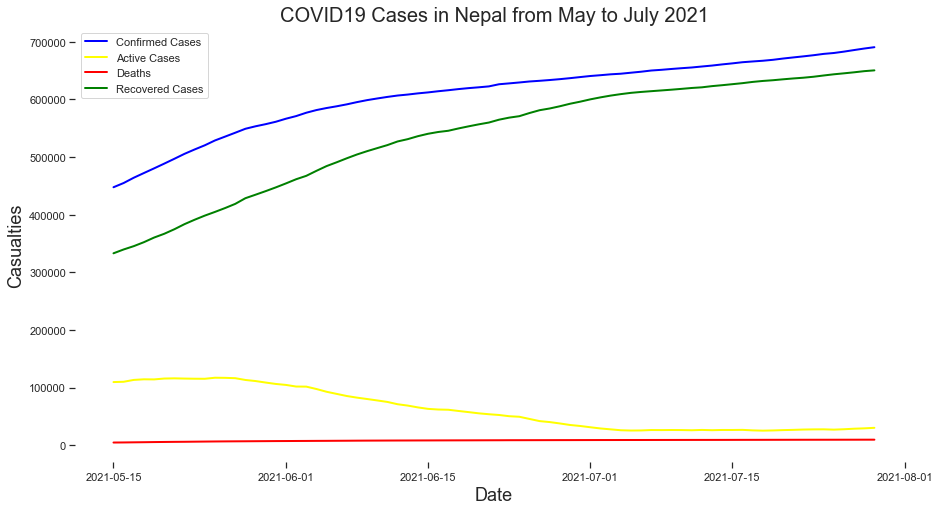

In [4]:
NP = (df.loc[df['Country/Region'] == 'Nepal'])
NP['Active'] = NP['Confirmed']-(NP['Recovered'] + NP['Deaths'])
NP =NP.groupby('Date')['Confirmed','Recovered', 'Deaths','Active'].sum()
NP = NP.loc['2021-05-15':'2021-07-29']
NP = NP.reset_index()
NP['Date'] = pd.to_datetime(NP['Date'])

sns.set(style="ticks", rc={"lines.linewidth": 2})
f, axes = plt.subplots(1, sharey=False, figsize=(15, 8))
sns.lineplot(x="Date", y="Confirmed", color='blue', label="Confirmed Cases", linestyle="-", data=NP)
sns.lineplot(x="Date", y="Active", color='yellow', label="Active Cases", linestyle="-", data=NP)
sns.lineplot(x="Date", y="Deaths", color='red', label="Deaths", linestyle="-", data=NP)
sns.lineplot(x="Date", y="Recovered", color='green', label="Recovered Cases", linestyle="-", data=NP)
axes.set_title("COVID19 Cases in Nepal from May to July 2021", fontsize=20)
sns.despine(left = True, bottom = True)
plt.legend(ncol = 1, loc = 'upper left')
plt.ylabel("Casualties", fontsize=18)
plt.xlabel("Date", fontsize=18)
plt.show()

C:\Users\ss11645\AppData\Local\Temp/ipykernel_4428/1649525914.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\ss11645\AppData\Local\Temp/ipykernel_4428/1649525914.py:3: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



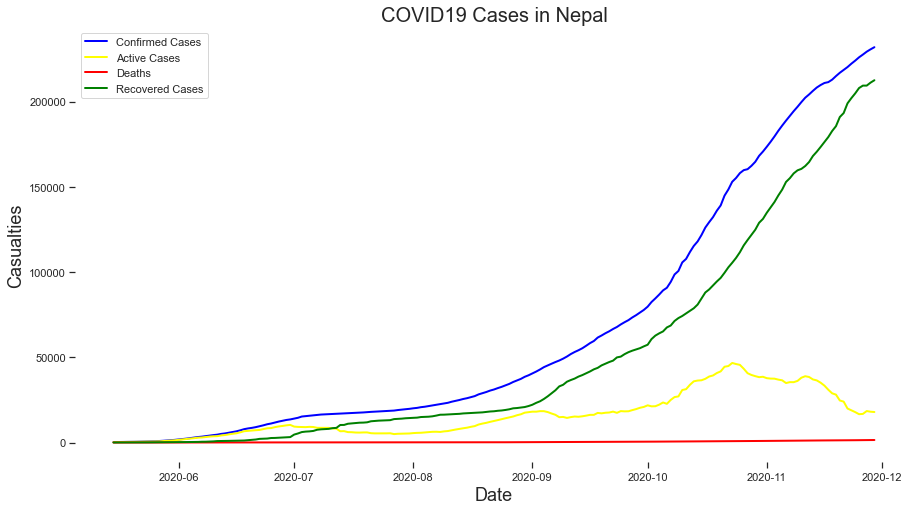

In [8]:
NP = (df.loc[df['Country/Region'] == 'Nepal'])
NP['Active'] = NP['Confirmed']-(NP['Recovered'] + NP['Deaths'])
NP =NP.groupby('Date')['Confirmed','Recovered', 'Deaths','Active'].sum()
NP = NP.loc['2020-05-15':'2020-11-29']
NP = NP.reset_index()
NP['Date'] = pd.to_datetime(NP['Date'])

sns.set(style="ticks", rc={"lines.linewidth": 2})
f, axes = plt.subplots(1, sharey=False, figsize=(15, 8))
sns.lineplot(x="Date", y="Confirmed", color='blue', label="Confirmed Cases", linestyle="-", data=NP)
sns.lineplot(x="Date", y="Active", color='yellow', label="Active Cases", linestyle="-", data=NP)
sns.lineplot(x="Date", y="Deaths", color='red', label="Deaths", linestyle="-", data=NP)
sns.lineplot(x="Date", y="Recovered", color='green', label="Recovered Cases", linestyle="-", data=NP)
axes.set_title("COVID19 Cases in Nepal", fontsize=20)
sns.despine(left = True, bottom = True)
plt.legend(ncol = 1, loc = 'upper left')
plt.ylabel("Casualties", fontsize=18)
plt.xlabel("Date", fontsize=18)
plt.show()

C:\Users\ss11645\AppData\Local\Temp/ipykernel_4428/3909016948.py:2: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



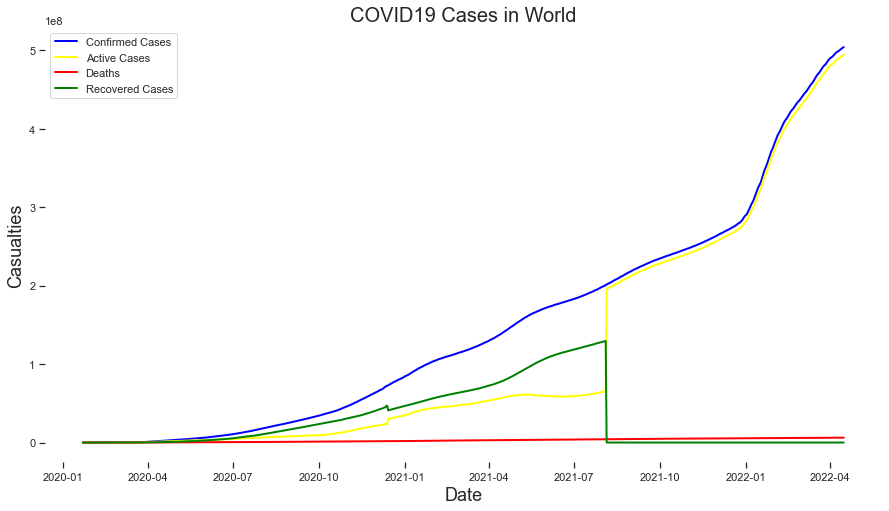

In [12]:
df['Active'] = df['Confirmed']-(df['Recovered'] + df['Deaths'])
NP = df.groupby('Date')['Confirmed','Recovered', 'Deaths','Active'].sum().reset_index()
NP['Date'] = pd.to_datetime(NP['Date'])
sns.set(style="ticks", rc={"lines.linewidth": 2})
f, axes = plt.subplots(1, sharey=False, figsize=(15, 8))
sns.lineplot(x="Date", y="Confirmed", color='blue', label="Confirmed Cases", linestyle="-", data=NP)
sns.lineplot(x="Date", y="Active", color='yellow', label="Active Cases", linestyle="-", data=NP)
sns.lineplot(x="Date", y="Deaths", color='red', label="Deaths", linestyle="-", data=NP)
sns.lineplot(x="Date", y="Recovered", color='green', label="Recovered Cases", linestyle="-", data=NP)
axes.set_title("COVID19 Cases in World", fontsize=20)
sns.despine(left = True, bottom = True)
plt.legend(ncol = 1, loc = 'upper left')
plt.ylabel("Casualties", fontsize=18)
plt.xlabel("Date", fontsize=18)
plt.show()

In [13]:
NP = (df.loc[df['Country/Region'] == 'Nepal'])
NP['Active'] = NP['Confirmed']-(NP['Recovered'] + NP['Deaths'])
NP =NP.groupby('Date')['Confirmed','Recovered', 'Deaths','Active'].sum()
Data_Nepal = NP.reset_index()
Data_Nepal['Date'] = pd.to_datetime(Data_Nepal['Date'])

fig = go.Figure()
fig.add_trace(go.Scatter(x=Data_Nepal['Date'], y=Data_Nepal['Confirmed'],
                    mode='lines',
                    name='Confirmed cases'))

fig.add_trace(go.Scatter(x=Data_Nepal['Date'], y=Data_Nepal['Active'],
                    mode='lines',
                    name='Active cases',line=dict( dash='dot')))
fig.add_trace(go.Scatter(x=Data_Nepal['Date'], y=Data_Nepal['Deaths'],name='Deaths',
                                   marker_color='yellow',mode='lines',line=dict( dash='dot') ))
fig.add_trace(go.Scatter(x=Data_Nepal['Date'], y=Data_Nepal['Recovered'],
                    mode='lines',
                    name='Recovered cases',marker_color='green'))
fig.update_layout(
    title='Cases over time in Nepal',
    template='plotly_dark',

)

fig.update_layout(
    annotations=[
        dict(
            x=-0.1,
            y=-0.15,
            showarrow=False,
            text="Dr. Sachin Subedi",
            xref="paper",
            yref="paper",
            )
            ,   
    ],

)

fig.show()



C:\Users\ss11645\AppData\Local\Temp/ipykernel_4428/1104260959.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\ss11645\AppData\Local\Temp/ipykernel_4428/1104260959.py:3: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



In [14]:
NP = (df.loc[df['Country/Region'] == 'US'])
NP['Active'] = NP['Confirmed']-(NP['Recovered'] + NP['Deaths'])
NP =NP.groupby('Date')['Confirmed','Recovered', 'Deaths','Active'].sum()
Data_Nepal = NP.reset_index()
Data_Nepal['Date'] = pd.to_datetime(Data_Nepal['Date'])

fig = go.Figure()
fig.add_trace(go.Scatter(x=Data_Nepal['Date'], y=Data_Nepal['Confirmed'],
                    mode='lines',
                    name='Confirmed cases'))

fig.add_trace(go.Scatter(x=Data_Nepal['Date'], y=Data_Nepal['Active'],
                    mode='lines',
                    name='Active cases',line=dict( dash='dot')))
fig.add_trace(go.Scatter(x=Data_Nepal['Date'], y=Data_Nepal['Deaths'],name='Deaths',
                                   marker_color='yellow',mode='lines',line=dict( dash='dot') ))
fig.add_trace(go.Scatter(x=Data_Nepal['Date'], y=Data_Nepal['Recovered'],
                    mode='lines',
                    name='Recovered cases',marker_color='green'))
fig.update_layout(
    title='Cases over time in US',
    template='plotly_dark',

)

fig.show()


C:\Users\ss11645\AppData\Local\Temp/ipykernel_4428/2424018184.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\ss11645\AppData\Local\Temp/ipykernel_4428/2424018184.py:3: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



In [15]:
df['Active'] = df['Confirmed']-(df['Recovered'] + df['Deaths'])
Data_Nepal = df.groupby('Date')['Confirmed','Recovered', 'Deaths','Active'].sum().reset_index()
Data_Nepal['Date'] = pd.to_datetime(Data_Nepal['Date'])

fig = go.Figure()
fig.add_trace(go.Scatter(x=Data_Nepal['Date'], y=Data_Nepal['Confirmed'],
                    mode='lines',
                    name='Confirmed cases'))

fig.add_trace(go.Scatter(x=Data_Nepal['Date'], y=Data_Nepal['Active'],
                    mode='lines',
                    name='Active cases',line=dict( dash='dot')))
fig.add_trace(go.Scatter(x=Data_Nepal['Date'], y=Data_Nepal['Deaths'],name='Deaths',
                                   marker_color='yellow',mode='lines',line=dict( dash='dot') ))
fig.add_trace(go.Scatter(x=Data_Nepal['Date'], y=Data_Nepal['Recovered'],
                    mode='lines',
                    name='Recovered cases',marker_color='green'))
fig.update_layout(
    title='Cases over time in World',
    template='plotly_dark',

)

fig.show()


C:\Users\ss11645\AppData\Local\Temp/ipykernel_4428/377194815.py:2: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



In [16]:
NP = (df.loc[df['Country/Region'] == 'United Kingdom'])
NP['Active'] = NP['Confirmed']-(NP['Recovered'] + NP['Deaths'])
NP =NP.groupby('Date')['Confirmed','Recovered', 'Deaths','Active'].sum()
Data_Nepal = NP.reset_index()
Data_Nepal['Date'] = pd.to_datetime(Data_Nepal['Date'])

fig = go.Figure()
fig.add_trace(go.Scatter(x=Data_Nepal['Date'], y=Data_Nepal['Confirmed'],
                    mode='lines',
                    name='Confirmed cases'))

fig.add_trace(go.Scatter(x=Data_Nepal['Date'], y=Data_Nepal['Active'],
                    mode='lines',
                    name='Active cases',line=dict( dash='dot')))
fig.add_trace(go.Scatter(x=Data_Nepal['Date'], y=Data_Nepal['Deaths'],name='Deaths',
                                   marker_color='yellow',mode='lines',line=dict( dash='dot') ))
fig.add_trace(go.Scatter(x=Data_Nepal['Date'], y=Data_Nepal['Recovered'],
                    mode='lines',
                    name='Recovered cases',marker_color='green'))
fig.update_layout(
    title='Cases over time in UK',
    template='plotly_dark',

)

fig.show()


C:\Users\ss11645\AppData\Local\Temp/ipykernel_4428/1731621110.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\ss11645\AppData\Local\Temp/ipykernel_4428/1731621110.py:3: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



In [17]:
NP = (df.loc[df['Country/Region'] == 'Italy'])
NP['Active'] = NP['Confirmed']-(NP['Recovered'] + NP['Deaths'])
NP =NP.groupby('Date')['Confirmed','Recovered', 'Deaths','Active'].sum()
Data_Nepal = NP.reset_index()
Data_Nepal['Date'] = pd.to_datetime(Data_Nepal['Date'])

fig = go.Figure()
fig.add_trace(go.Scatter(x=Data_Nepal['Date'], y=Data_Nepal['Confirmed'],
                    mode='lines',
                    name='Confirmed cases'))

fig.add_trace(go.Scatter(x=Data_Nepal['Date'], y=Data_Nepal['Active'],
                    mode='lines',
                    name='Active cases',line=dict( dash='dot')))
fig.add_trace(go.Scatter(x=Data_Nepal['Date'], y=Data_Nepal['Deaths'],name='Deaths',
                                   marker_color='yellow',mode='lines',line=dict( dash='dot') ))
fig.add_trace(go.Scatter(x=Data_Nepal['Date'], y=Data_Nepal['Recovered'],
                    mode='lines',
                    name='Recovered cases',marker_color='green'))
fig.update_layout(
    title='Cases over time in Italy',
    template='plotly_dark',

)

fig.show()


C:\Users\ss11645\AppData\Local\Temp/ipykernel_4428/4170314765.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\ss11645\AppData\Local\Temp/ipykernel_4428/4170314765.py:3: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



In [18]:
NP = (df.loc[df['Country/Region'] == 'France'])
NP['Active'] = NP['Confirmed']-(NP['Recovered'] + NP['Deaths'])
NP =NP.groupby('Date')['Confirmed','Recovered', 'Deaths','Active'].sum()
Data_Nepal = NP.reset_index()
Data_Nepal['Date'] = pd.to_datetime(Data_Nepal['Date'])

fig = go.Figure()
fig.add_trace(go.Scatter(x=Data_Nepal['Date'], y=Data_Nepal['Confirmed'],
                    mode='lines',
                    name='Confirmed cases'))

fig.add_trace(go.Scatter(x=Data_Nepal['Date'], y=Data_Nepal['Active'],
                    mode='lines',
                    name='Active cases',line=dict( dash='dot')))
fig.add_trace(go.Scatter(x=Data_Nepal['Date'], y=Data_Nepal['Deaths'],name='Deaths',
                                   marker_color='yellow',mode='lines',line=dict( dash='dot') ))
fig.add_trace(go.Scatter(x=Data_Nepal['Date'], y=Data_Nepal['Recovered'],
                    mode='lines',
                    name='Recovered cases',marker_color='green'))
fig.update_layout(
    title='Cases over time in France',
    template='plotly_dark',

)

fig.show()

C:\Users\ss11645\AppData\Local\Temp/ipykernel_4428/2760836534.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\ss11645\AppData\Local\Temp/ipykernel_4428/2760836534.py:3: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



In [19]:
NP = (df.loc[df['Country/Region'] == 'Spain'])
NP['Active'] = NP['Confirmed']-(NP['Recovered'] + NP['Deaths'])
NP =NP.groupby('Date')['Confirmed','Recovered', 'Deaths','Active'].sum()
Data_Nepal = NP.reset_index()
Data_Nepal['Date'] = pd.to_datetime(Data_Nepal['Date'])

fig = go.Figure()
fig.add_trace(go.Scatter(x=Data_Nepal['Date'], y=Data_Nepal['Confirmed'],
                    mode='lines',
                    name='Confirmed cases'))

fig.add_trace(go.Scatter(x=Data_Nepal['Date'], y=Data_Nepal['Active'],
                    mode='lines',
                    name='Active cases',line=dict( dash='dot')))
fig.add_trace(go.Scatter(x=Data_Nepal['Date'], y=Data_Nepal['Deaths'],name='Deaths',
                                   marker_color='yellow',mode='lines',line=dict( dash='dot') ))
fig.add_trace(go.Scatter(x=Data_Nepal['Date'], y=Data_Nepal['Recovered'],
                    mode='lines',
                    name='Recovered cases',marker_color='green'))
fig.update_layout(
    title='Cases over time in Spain',
    template='plotly_dark',

)

fig.show()

C:\Users\ss11645\AppData\Local\Temp/ipykernel_4428/3807304407.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\ss11645\AppData\Local\Temp/ipykernel_4428/3807304407.py:3: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



In [20]:
NP = (df.loc[df['Country/Region'] == 'China'])
NP['Active'] = NP['Confirmed']-(NP['Recovered'] + NP['Deaths'])
NP =NP.groupby('Date')['Confirmed','Recovered', 'Deaths','Active'].sum()
Data_Nepal = NP.reset_index()
Data_Nepal['Date'] = pd.to_datetime(Data_Nepal['Date'])

fig = go.Figure()
fig.add_trace(go.Scatter(x=Data_Nepal['Date'], y=Data_Nepal['Confirmed'],
                    mode='lines',
                    name='Confirmed cases'))

fig.add_trace(go.Scatter(x=Data_Nepal['Date'], y=Data_Nepal['Active'],
                    mode='lines',
                    name='Active cases',line=dict( dash='dot')))
fig.add_trace(go.Scatter(x=Data_Nepal['Date'], y=Data_Nepal['Deaths'],name='Deaths',
                                   marker_color='yellow',mode='lines',line=dict( dash='dot') ))
fig.add_trace(go.Scatter(x=Data_Nepal['Date'], y=Data_Nepal['Recovered'],
                    mode='lines',
                    name='Recovered cases',marker_color='green'))
fig.update_layout(
    title='Cases over time in China',
    template='plotly_dark',

)

fig.show()

C:\Users\ss11645\AppData\Local\Temp/ipykernel_4428/280265146.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\ss11645\AppData\Local\Temp/ipykernel_4428/280265146.py:3: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



In [21]:
NP = (df.loc[df['Country/Region'] == 'India'])
NP['Active'] = NP['Confirmed']-(NP['Recovered'] + NP['Deaths'])
NP =NP.groupby('Date')['Confirmed','Recovered', 'Deaths','Active'].sum()
Data_Nepal = NP.reset_index()
Data_Nepal['Date'] = pd.to_datetime(Data_Nepal['Date'])

fig = go.Figure()
fig.add_trace(go.Scatter(x=Data_Nepal['Date'], y=Data_Nepal['Confirmed'],
                    mode='lines',
                    name='Confirmed cases'))

fig.add_trace(go.Scatter(x=Data_Nepal['Date'], y=Data_Nepal['Active'],
                    mode='lines',
                    name='Active cases',line=dict( dash='dot')))
fig.add_trace(go.Scatter(x=Data_Nepal['Date'], y=Data_Nepal['Deaths'],name='Deaths',
                                   marker_color='yellow',mode='lines',line=dict( dash='dot') ))
fig.add_trace(go.Scatter(x=Data_Nepal['Date'], y=Data_Nepal['Recovered'],
                    mode='lines',
                    name='Recovered cases',marker_color='green'))
fig.update_layout(
    title='Cases over time in India',
    template='plotly_dark',

)

fig.show()

C:\Users\ss11645\AppData\Local\Temp/ipykernel_4428/2814563535.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\ss11645\AppData\Local\Temp/ipykernel_4428/2814563535.py:3: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



In [22]:
NP = (df.loc[df['Country/Region'] == 'Germany'])
NP['Active'] = NP['Confirmed']-(NP['Recovered'] + NP['Deaths'])
NP =NP.groupby('Date')['Confirmed','Recovered', 'Deaths','Active'].sum()
Data_Nepal = NP.reset_index()
Data_Nepal['Date'] = pd.to_datetime(Data_Nepal['Date'])

fig = go.Figure()
fig.add_trace(go.Scatter(x=Data_Nepal['Date'], y=Data_Nepal['Confirmed'],
                    mode='lines',
                    name='Confirmed cases'))

fig.add_trace(go.Scatter(x=Data_Nepal['Date'], y=Data_Nepal['Active'],
                    mode='lines',
                    name='Active cases',line=dict( dash='dot')))
fig.add_trace(go.Scatter(x=Data_Nepal['Date'], y=Data_Nepal['Deaths'],name='Deaths',
                                   marker_color='yellow',mode='lines',line=dict( dash='dot') ))
fig.add_trace(go.Scatter(x=Data_Nepal['Date'], y=Data_Nepal['Recovered'],
                    mode='lines',
                    name='Recovered cases',marker_color='green'))
fig.update_layout(
    title='Cases over time in India',
    template='plotly_dark',

)

fig.show()

C:\Users\ss11645\AppData\Local\Temp/ipykernel_4428/112486901.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\ss11645\AppData\Local\Temp/ipykernel_4428/112486901.py:3: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



In [23]:
NP = (df.loc[df['Country/Region'] == 'Italy'])
NP['Active'] = NP['Confirmed']-(NP['Recovered'] + NP['Deaths'])
NP =NP.groupby('Date')['Confirmed','Recovered', 'Deaths','Active'].sum()
Data_Nepal = NP.reset_index()
Data_Nepal['Date'] = pd.to_datetime(Data_Nepal['Date'])

fig = go.Figure()
fig.add_trace(go.Scatter(x=Data_Nepal['Date'], y=Data_Nepal['Confirmed'],
                    mode='lines',
                    name='Confirmed cases'))

fig.add_trace(go.Scatter(x=Data_Nepal['Date'], y=Data_Nepal['Active'],
                    mode='lines',
                    name='Active cases',line=dict( dash='dot')))
fig.add_trace(go.Scatter(x=Data_Nepal['Date'], y=Data_Nepal['Deaths'],name='Deaths',
                                   marker_color='yellow',mode='lines',line=dict( dash='dot') ))
fig.add_trace(go.Scatter(x=Data_Nepal['Date'], y=Data_Nepal['Recovered'],
                    mode='lines',
                    name='Recovered cases',marker_color='green'))
fig.update_layout(
    title='Cases over time in India',
    template='plotly_dark',

)

fig.show()

C:\Users\ss11645\AppData\Local\Temp/ipykernel_4428/2184090251.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\ss11645\AppData\Local\Temp/ipykernel_4428/2184090251.py:3: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.

